## Задание 09
В этом задании мы разберемся с тем, как работают методы снижения размерности и кластеризации данных. 
Мы будем работать с набором данных [Samsung Human Activity Recognition](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones).  Данные поступают с акселерометров и гироскопов мобильных телефонов Samsung Galaxy S3 (подробнее про признаки – по ссылке на UCI выше), также известен вид активности человека с телефоном в кармане – ходил ли он, стоял, лежал, сидел или шел вверх/вниз по лестнице. 

Мы представим, что вид активности нам неизвестнен, и попробуем кластеризовать людей чисто на основе имеющихся признаков. 

In [89]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

* Скачайте данные самостоятельно. Объедините тестовую и обучающую выборку в одну (для задачи кластеризации тестовая выборка не понадобится). 

In [90]:
lol = pd.read_csv('X_train.txt', sep="\t", header=None)
kek = pd.read_csv('X_test.txt', sep="\t", header=None)

In [91]:
final_dict = []
for i in range(0,lol[0].size):
    fllist = []
    for idx in lol[0][i][2:].split(' '):
        if idx != '':
            fllist.append(float(idx))
    final_dict.append(fllist)
for i in range(0,kek[0].size):
    fllist = []
    for idx in kek[0][i][2:].split(' '):
        if idx != '':
            fllist.append(float(idx))
    final_dict.append(fllist)

In [92]:
df = pd.DataFrame(data = final_dict)

In [93]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [94]:
df.shape

(10299, 561)

* Определите число уникальных значений меток целевого класса. Будем использовать это значения для числа кластеров (в общем случае, число кластеров, мы естественно не знаем). 

In [95]:
answer1 = pd.read_csv('y_train.txt', sep="\t", header=None)
answer2 = pd.read_csv('y_test.txt', sep="\t", header=None)
list1 = answer1[0].values
list2 = answer2[0].values

y = np.concatenate((list1,list2))

In [96]:
cluster_number = len(np.unique(answer1[0].append(answer2[0])))
cluster_number

6

* Отмасштабируйте выборку с помощью `StandardScaler` с параметрами по умолчанию.

In [97]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

* С помощью PCA, оставьте столько компонент, сколько нужно для того, чтобы объяснить как минимум 90% дисперсии исходных (отмасштабированных) данных. Какое минимальное число главных компонент нужно выделить, чтобы объяснить 90% дисперсии исходных (отмасштабированных) данных?

<Figure size 432x288 with 0 Axes>

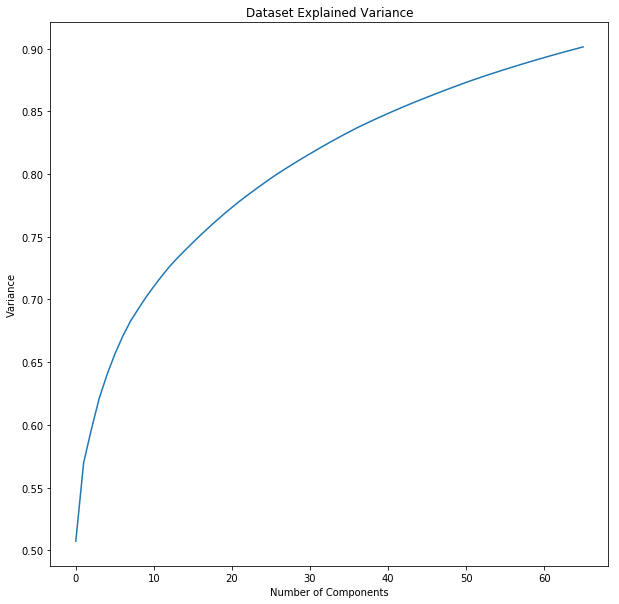

0.901372737126197


In [101]:
pca = PCA(n_components= 66)
X_reduced = pca.fit_transform(X_scaled)


plt.figure()
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Components')
plt.ylabel('Variance') 
plt.title('Dataset Explained Variance')
plt.show()

print(np.sum(pca.explained_variance_ratio_))

##### Требуется не менее 66 компонент.

* Сколько процентов дисперсии приходится на первую главную компоненту?

In [102]:
print(pca.explained_variance_ratio_[0])

0.5073823509275011


* Визуализируйте данные в проекции на первые две главные компоненты.

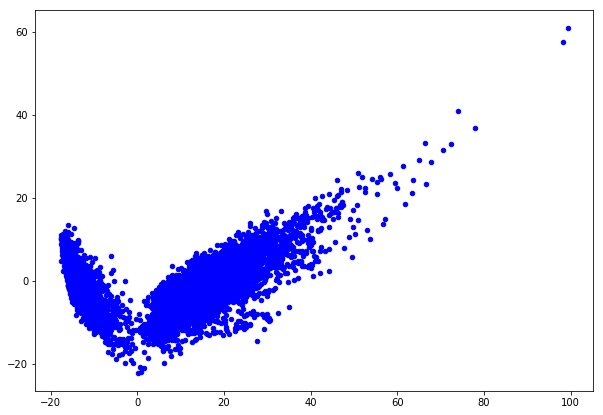

In [103]:
plt.figure(figsize=(10,7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s=20, c='b')
plt.show()

* Сделайте кластеризацию данных методом `KMeans`, обучив модель на данных со сниженной за счет PCA размерностью.  

In [104]:
k_means = KMeans(n_clusters = cluster_number)
k_means = k_means.fit(X_reduced)
clusters = k_means.predict(X_reduced)

* Визуализируйте данные в проекции на первые две главные компоненты. Раскрасьте точки в соответствии с полученными метками кластеров.

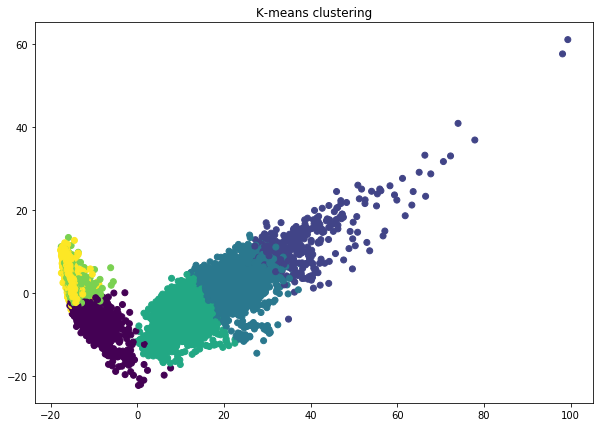

In [105]:
plt.figure(figsize=(10,7))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c = clusters)
plt.title('K-means clustering')
plt.show()

* Сделайте кластеризацию с помощью агломеративного метода. 

In [106]:
ag = AgglomerativeClustering(n_clusters = cluster_number, linkage='ward').fit(X_reduced)

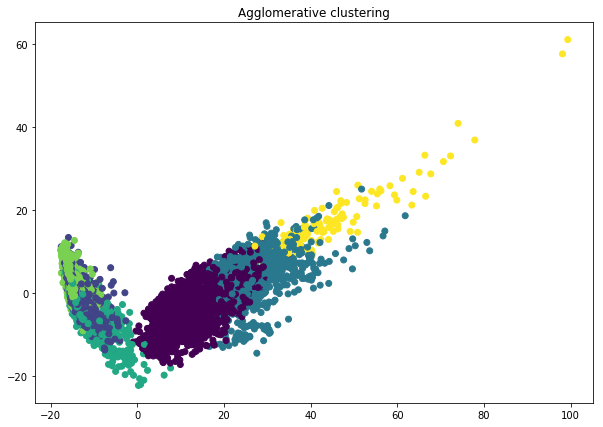

In [107]:
plt.figure(figsize=(10,7))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c = ag.labels_)
plt.title('Agglomerative clustering')
plt.show()

* Cравните работу двух алгоритмов по значениям [Adjusted Rand Index (ARI)](https://en.wikipedia.org/wiki/Rand_index).

**Adjusted Rand Index (ARI)**

Предполагается, что известны истинные метки объектов. Данная мера не зависит от самих значений меток, а только от разбиения выборки на кластеры. Пусть $N$ - число объектов в выборке. Обозначим через $a$ - число пар объектов, имеющих одинаковые метки и находящихся в одном кластере, через $b$ - число пар объектов, имеющих различные метки и находящихся в разных кластерах. Тогда Rand Index это $$\text{RI} = \frac{2(a + b)}{n(n-1)}.$$ То есть это доля объектов, для которых эти разбиения (исходное и полученное в результате кластеризации) "согласованы". Rand Index (RI) выражает схожесть двух разных кластеризаций одной и той же выборки. Чтобы этот индекс давал значения близкие к нулю для случайных кластеризаций при любом $N$ и числе кластеров, необходимо нормировать его. Так определяется Adjusted Rand Index: $$\text{ARI} = \frac{\text{RI} - E[\text{RI}]}{\max(\text{RI}) - E[\text{RI}]}.$$

Эта мера симметрична, не зависит от значений и перестановок меток. Таким образом, данный индекс является мерой расстояния между различными разбиениями выборки. $\text{ARI}$ принимает значения в диапазоне $[-1, 1]$. Отрицательные значения соответствуют "независимым" разбиениям на кластеры, значения, близкие к нулю, - случайным разбиениям, и положительные значения говорят о том, что два разбиения схожи (совпадают при $\text{ARI} = 1$).

In [108]:
from sklearn.metrics.cluster import adjusted_rand_score

In [110]:
print("K-means score ", adjusted_rand_score(y, clusters))
print("Agglomerative score ", adjusted_rand_score(y, ag.labels_))

K-means score  0.4196796496755816
Agglomerative score  0.46466396708281354
